<a href="https://colab.research.google.com/github/MachineSaver/MachineSaver/blob/main/Machine_Saver_Web_Portal_API_Integration_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Saver Web Portal Integration Examples

[Read the API Documentation](https://www.bipom.com/documents/WiPOM/WRTU%20Web%20Portal%20API.pdf)

In [2]:
from typing import Optional, List, Dict
import pandas as pd
import requests
from typing import List, Dict, Union, Optional, Tuple, Any
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import logging

# Get Your Authorization Token

In [3]:
def get_auth_token(username: str, password: str) -> str:
  """Login to Machine Saver API and retrieve access token."""
  url = "https://api.portal.machinesaver.com/v1/Login"
  data = {
      'grant_type': 'password',
      'username': username,  # Replace with actual username
      'password': password   # Replace with actual password
  }

  response = requests.post(url, data=data)

  if response.status_code == 200:
      token_data = response.json()
      access_token = token_data.get('access_token')
      return access_token
  else:
      print(f"Failed to login: {response.status_code} - {response.text}")
      return None

In [4]:
access_token = get_auth_token('Generic_Demo', 'Nf!Ut9gCTPhaUv')

In [5]:
print(access_token)

WL5db3PaLwz_4q3NTyNahtv3_YTIfPIQ_OK4_KuQxZfA8wBDasK4H3kgOh3J5O35HOolmHUzHudQstq0pITCQqaZD_BycGqX0a-RNlTAThM8Vcq1X505A5UKhNh5hZyWdheHPBCeS9lxNxEMu3WyfF079zF4B8acPu0TaVkcuOEf0grhKjCpben0__NQAJ3jdFaLBnItMVUFFvkCdP5k_bCPnlKGfwF7uMcj2VZbSdRZ4yrm-HoUA1QIY06nKfji3VYFQK5BT12IE9Urpn3hh8IlQQbSPPQ4HX9BWszpi_i_2YRu1KRx8uwF7QheNYm6f5wkcGyQvIpOlnoZkBMmnSMCcPzApVMAdQNN9YknRmRYcrjGfqZdbYDma8KfvOeEIvNww-AV0wKQlPjeEpRiWHP0LbE


# Get Accounts List

In [6]:
def get_accounts_list(access_token: str) -> dict:
    """Get accounts list from Machine Saver API."""
    url = "https://api.portal.machinesaver.com/v1/AccountsList"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch accounts: {response.status_code} - {response.text}")
        return None

In [7]:
account_list = get_accounts_list(access_token)

In [8]:
# Convert to DataFrame
df = pd.DataFrame(account_list)
df

""


# Get Device List

In [9]:
def get_devices_list(access_token: str) -> dict:
    """Get devices list from Machine Saver API."""
    url = "https://api.portal.machinesaver.com/v1/DevicesList"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch devices list: {response.status_code} - {response.text}")
        return None

In [10]:
device_list = get_devices_list(access_token)

In [11]:
# Convert to DataFrame
df = pd.DataFrame(device_list)
df

,Id,AccountId,Serial,IsActive,IPAddress,CreateAt,CreatedbyUser,IsCGVtbCom,DeviceName
0,1244,441,KM4AP5A813,True,10.11.0.219;166.146.188.65,2024-09-11T19:23:17.444,110,False,Cloudgate Mini


# Get Sensor List Using Gateway ID

In [12]:
def get_sensors_list(device_id: int, access_token: str) -> dict:
    """Get sensors list for a specific device from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/SensorsList?deviceId={device_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch sensor data: {response.status_code} - {response.text}")
        return None

In [13]:
sensor_list = get_sensors_list(1244, access_token)

In [14]:
print(sensor_list)

[{'DeviceId': 1244, 'AccountId': 10618, 'Type': 'AIRVIBE', 'Tags': [{'Id': 1134782, 'IsActive': True, 'DeviceId': 1244, 'Name': '8C1F642113000023 - Acceleration Axis 1', 'Type': 'DS', 'Address': 0, 'VirtualAddress': 0, 'Units1': 'g', 'Units2': '', 'LogPeriod': 0, 'MBRtu': 0, 'MBType': None, 'MBAddress': 0, 'MBValueType': None, 'MBValueByteOrder': None, 'IsVMapEnabled': False, 'IsBMapEnabled': False, 'MaxLoggedAt': None, 'RecordsNumber': 0, 'VMapPresent': False, 'BMapPresent': False}, {'Id': 1134783, 'IsActive': True, 'DeviceId': 1244, 'Name': '8C1F642113000023 - Acceleration Axis 2', 'Type': 'DS', 'Address': 0, 'VirtualAddress': 0, 'Units1': 'g', 'Units2': '', 'LogPeriod': 0, 'MBRtu': 0, 'MBType': None, 'MBAddress': 0, 'MBValueType': None, 'MBValueByteOrder': None, 'IsVMapEnabled': False, 'IsBMapEnabled': False, 'MaxLoggedAt': None, 'RecordsNumber': 0, 'VMapPresent': False, 'BMapPresent': False}, {'Id': 1134784, 'IsActive': True, 'DeviceId': 1244, 'Name': '8C1F642113000023 - Accelerati

In [17]:
import pandas as pd

# Flatten the nested 'Tags' and keep parent columns
df = pd.json_normalize(
    data,
    record_path='Tags',          # Explode the 'Tags' list
    meta=[
        'DeviceId',
        'AccountId',
        'Type',
        'SensorName',
        'RTU',
        'DevuceEUI'             # Parent-level columns to retain
    ],
    meta_prefix='Parent_'       # Prefix parent columns to avoid conflicts
)

# Rename conflicting columns (e.g., 'Type' from Tags vs. Parent)
df.rename(columns={'Parent_Type': 'DeviceType', 'Type': 'TagType'}, inplace=True)

# Select and reorder the desired columns
columns_to_display = ['DeviceType', 'Name', 'Id', 'Parent_DeviceId', 'TagType', 'Units1', 'LogPeriod', 'RecordsNumber']
df = df[columns_to_display]

# Sort by the 'Name' column alphabetically
df.sort_values(by='Name', inplace=False)

# Display the DataFrame
df


,DeviceType,Name,Id,Parent_DeviceId,TagType,Units1,LogPeriod,RecordsNumber
0,AIRVIBE,8C1F642113000023 - Acceleration Axis 1,1134782,1244,DS,g,0,0
1,AIRVIBE,8C1F642113000023 - Acceleration Axis 2,1134783,1244,DS,g,0,0
2,AIRVIBE,8C1F642113000023 - Acceleration Axis 3,1134784,1244,DS,g,0,0
3,AIRVIBE,8C1F642113000023 - Temperature,1134785,1244,HR,C,60,5874
4,AIRVIBE,8C1F642113000023 - Battery,1134786,1244,HR,%%,60,6112
5,AIRVIBE,8C1F642113000023 - Acceleration Axis 1 (RMS),1134787,1244,HR,g,60,6368
6,AIRVIBE,8C1F642113000023 - Acceleration Axis 2 (RMS),1134788,1244,HR,g,60,6536
7,AIRVIBE,8C1F642113000023 - Acceleration Axis 3 (RMS),1134789,1244,HR,g,60,6645
8,AIRVIBE,8C1F642113000023 - Velocity Axis 1 (RMS),1134790,1244,HR,ips,60,6686
9,AIRVIBE,8C1F642113000023 - Velocity Axis 2 (RMS),1134791,1244,HR,ips,60,6702


# Get Data Tags Using Device ID

In [94]:
def get_tags_list(device_id: int, access_token: str) -> dict:
    """Get tags list for a specific device from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/TagsList?deviceId={device_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch tag list: {response.status_code} - {response.text}")
        return None

In [95]:
tag_list = get_tags_list(1244, access_token)

In [100]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Helper function to format display names
def format_tag_display(tag):
    return f"{tag['Id']} {tag['Name']} ({tag['Type']}, {tag['Units1']}, Records: {tag['RecordsNumber']})"

# Create the SelectMultiple widget
options = [(format_tag_display(tag), tag) for tag in tag_list]
multi_select_widget = widgets.SelectMultiple(
    options=options,
    description="Tags",
    rows=10,
    layout=widgets.Layout(width='80%')
)

# Create a button to submit the selection
submit_button = widgets.Button(description="Select Tags")
output = widgets.Output()

# Store the selected tags
selected_tags = []

def on_submit_click(b):
    global selected_tags
    with output:
        clear_output()  # Clear previous outputs
        selected_tags = list(multi_select_widget.value)
        if selected_tags:
            print("Selected Tags:")
            for tag in selected_tags:
                print(format_tag_display(tag))
        else:
            print("No tags selected.")

# Attach the button click event
submit_button.on_click(on_submit_click)

# Display the widgets
display(multi_select_widget, submit_button, output)


SelectMultiple(description='Tags', layout=Layout(width='80%'), options=(('1134782 8C1F642113000023 - Accelerat…

Button(description='Select Tags', style=ButtonStyle())

Output()

In [103]:
tag_list = get_tags_list(1244, access_token)

In [104]:
# Create a DataFrame directly from the list
df = pd.DataFrame(tag_list)

# Rename columns if needed (e.g., Type -> TagType)
df.rename(columns={'Type': 'TagType'}, inplace=True)

# Select and reorder the desired columns
columns_to_display = ['TagType', 'Name', 'Id', 'DeviceId', 'Units1', 'LogPeriod', 'RecordsNumber']
df = df[columns_to_display]

# Sort by the 'Name' column alphabetically
df.sort_values(by='Name', inplace=False)

# Display the DataFrame
df

,TagType,Name,Id,DeviceId,Units1,LogPeriod,RecordsNumber
0,DS,8C1F642113000023 - Acceleration Axis 1,1134782,1244,g,0,0
1,DS,8C1F642113000023 - Acceleration Axis 2,1134783,1244,g,0,0
2,DS,8C1F642113000023 - Acceleration Axis 3,1134784,1244,g,0,0
3,HR,8C1F642113000023 - Temperature,1134785,1244,C,60,6044
4,HR,8C1F642113000023 - Battery,1134786,1244,%%,60,6287
5,HR,8C1F642113000023 - Acceleration Axis 1 (RMS),1134787,1244,g,60,6550
6,HR,8C1F642113000023 - Acceleration Axis 2 (RMS),1134788,1244,g,60,6727
7,HR,8C1F642113000023 - Acceleration Axis 3 (RMS),1134789,1244,g,60,6839
8,HR,8C1F642113000023 - Velocity Axis 1 (RMS),1134790,1244,ips,60,6890
9,HR,8C1F642113000023 - Velocity Axis 2 (RMS),1134791,1244,ips,60,6912


# Get Tag Information

In [26]:
def get_tag_info(tag_id: int, access_token: str) -> dict:
    """Get tag information from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/TagInfo"
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'Id': tag_id}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

In [101]:
tag_info = get_tag_info(1134796, access_token)

In [102]:
import pandas as pd

# Your input tag (individual dictionary)
tag = tag_info

# Create a DataFrame from the individual tag
df = pd.DataFrame([tag])

# Rename columns if needed (e.g., Type -> TagType)
df.rename(columns={'Type': 'TagType'}, inplace=True)

# Select and reorder the desired columns
columns_to_display = ['TagType', 'Name', 'Id', 'DeviceId', 'Units1', 'LogPeriod', 'RecordsNumber']
df = df[columns_to_display]

# Display the DataFrame
df

,TagType,Name,Id,DeviceId,Units1,LogPeriod,RecordsNumber
0,HR,8C1F642113000029 - Temperature,1134796,1244,C,60,5829


Notes on the data below for the AirVibe Sensor:

Values that end in (RMS) and are of the type "HOLD" are the overall vibration data, which is typically used by operators to indicate that there is a problem an increased vibration, this is what is trended when we [Plot Tag Data](https://colab.research.google.com/github/MachineSaver/MachineSaver/blob/main/Machine_Saver_Web_Portal_API_Integration_Examples.ipynb#scrollTo=lLy-64d0vIXq&line=6&uniqifier=1)

Values that do not end in (RMS) and are of the type "DS" are the analysis vibration data (aka waveform, aka spectra), which is typically used by a vibration analyst or anomaly detection algorithm to tell you more specifically which component of a machine has increased vibration (such as a bearing) this is what is used when we [Plot Snapshot Data](https://colab.research.google.com/github/MachineSaver/MachineSaver/blob/main/Machine_Saver_Web_Portal_API_Integration_Examples.ipynb#scrollTo=rqbjauvmoDu-&line=23&uniqifier=1)

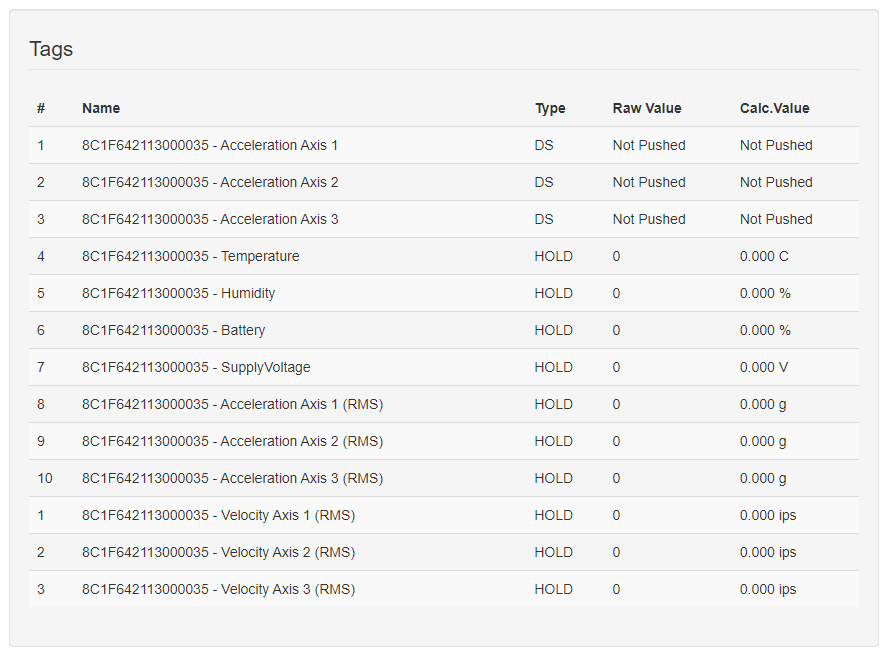

# Get Tag Data From a Specific Time

In [82]:
from datetime import datetime, timedelta
from typing import Optional, List, Dict
import requests
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

def get_tag_data(tag_id: int,
                 access_token: str,
                 start_time: Optional[str] = None,
                 end_time: Optional[str] = None,
                 use_date_picker: bool = False) -> Optional[pd.DataFrame]:
    """Fetch tag data from Machine Saver API, with optional date/time pickers."""

    # Default date and time calculations
    now = datetime.utcnow()
    default_end_time = now + timedelta(minutes=1)  # One minute from now
    default_start_time = now - timedelta(days=7)  # Seven days ago

    if use_date_picker:
        # Create date pickers with default values
        start_date_widget = widgets.DatePicker(
            description='Start Date',
            value=default_start_time.date()
        )
        end_date_widget = widgets.DatePicker(
            description='End Date',
            value=default_end_time.date()
        )

        # Create time text inputs with default values
        start_time_widget = widgets.Text(
            value=default_start_time.strftime('%H:%M:%S'),
            description='Start Time'
        )
        end_time_widget = widgets.Text(
            value=default_end_time.strftime('%H:%M:%S'),
            description='End Time'
        )

        # Create a button to confirm the selection
        confirm_button = widgets.Button(description="Submit")
        output = widgets.Output()

        def on_confirm_click(b):
            with output:
                clear_output()  # Clear previous outputs
                start_date = start_date_widget.value
                start_time_input = start_time_widget.value
                end_date = end_date_widget.value
                end_time_input = end_time_widget.value

                if not start_date or not end_date or not start_time_input or not end_time_input:
                    print("Please select valid start and end dates/times.")
                    return

                # Combine date and time inputs
                nonlocal start_time, end_time
                start_time = f"{start_date} {start_time_input}"
                end_time = f"{end_date} {end_time_input}"

                print(f"Selected Start Time: {start_time}")
                print(f"Selected End Time: {end_time}")

                # Make the API call with the selected times
                result = fetch_tag_data(tag_id, access_token, start_time, end_time)

                # Display API result as a DataFrame
                if result:
                    df = pd.DataFrame(result)
                    columns_to_display = ['Id', 'LoggedAt', 'CalcValue']
                    if all(col in df.columns for col in columns_to_display):
                        df = df[columns_to_display]
                    else:
                        print("Not all required columns are in the response. Displaying full DataFrame.")
                    display(df)
                else:
                    print("No data returned from the API.")

        # Display widgets
        display(start_date_widget, start_time_widget, end_date_widget, end_time_widget, confirm_button, output)

        # Attach event listener to the button
        confirm_button.on_click(on_confirm_click)

        return None  # Exit the function after displaying the widgets

    # Default times if not provided
    if end_time is None:
        end_time = default_end_time.strftime('%Y-%m-%d %H:%M:%S')
    if start_time is None:
        start_time = default_start_time.strftime('%Y-%m-%d %H:%M:%S')

    # Make the API call directly if use_date_picker=False
    result = fetch_tag_data(tag_id, access_token, start_time, end_time)
    if result:
        df = pd.DataFrame(result)
        columns_to_display = ['Id', 'LoggedAt', 'CalcValue']
        if all(col in df.columns for col in columns_to_display):
            df = df[columns_to_display]
        else:
            print("Not all required columns are in the response. Displaying full DataFrame.")
        return df
    return None


def fetch_tag_data(tag_id: int, access_token: str, start_time: str, end_time: str) -> Optional[List[Dict]]:
    """Helper function to fetch tag data from the API."""
    url = f"https://api.portal.machinesaver.com/v1/TagData"
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'tagId': tag_id, 'startTime': start_time, 'endTime': end_time}

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"Error: {e}")
        return None


In [85]:
tag_data = get_tag_data(tag_id=1134796, access_token=access_token, use_date_picker=True)

DatePicker(value=datetime.date(2025, 1, 17), description='Start Date')

Text(value='05:19:44', description='Start Time')

DatePicker(value=datetime.date(2025, 1, 24), description='End Date')

Text(value='05:20:44', description='End Time')

Button(description='Submit', style=ButtonStyle())

Output()

In [87]:
tag_data = get_tag_data(tag_id=1134796, access_token=access_token)
display(tag_data)

,Id,LoggedAt,CalcValue
0,866805034,2025-01-15T21:04:47.000,21.0
1,866805468,2025-01-15T21:05:47.000,21.0
2,866805601,2025-01-15T21:06:47.000,21.0
3,866811676,2025-01-15T21:21:39.000,22.0
4,866812140,2025-01-15T21:24:39.000,22.0
...,...,...,...
5817,870370709,2025-01-24T05:04:47.000,22.0
5818,870371695,2025-01-24T05:08:47.000,22.0
5819,870372955,2025-01-24T05:12:53.000,22.0
5820,870373498,2025-01-24T05:14:47.000,22.0


# Plot Tag Data

In [105]:
def set_machine_saver_theme():
    """Set up the Machine Saver plotly theme."""
    pio.templates["draft"] = go.layout.Template(
        layout_annotations=[
            dict(
                name="draft watermark",
                text="Machine Saver Inc.",
                textangle=-30,
                opacity=0.1,
                font=dict(color="white", size=50),
                xref="paper",
                yref="paper",
                x=0.5,
                y=0.5,
                showarrow=True,
            )
        ]
    )
    pio.templates.default = "plotly_dark+draft"

def get_trace_color(name: str) -> str:
    """
    Determine the color for a trace based on the axis name.

    Args:
        name (str): The name of the trace containing axis information

    Returns:
        str: Hex color code for the trace
    """
    if "axis 1" in name.lower():
        return "#4CC9FE"
    elif "axis 2" in name.lower():
        return "#FFF100"
    elif "axis 3" in name.lower():
        return "#D91656"
    return "#808080"  # Default color for unmatched names

def get_measurement_type(tag_name: str) -> Optional[str]:
    """
    Determine the measurement type from the tag name.

    Args:
        tag_name (str): Name of the tag

    Returns:
        Optional[str]: Measurement type if matched, None otherwise
    """
    tag_name_lower = tag_name.lower()
    if "velocity" in tag_name_lower:
        return "velocity"
    elif "acceleration" in tag_name_lower:
        return "acceleration"
    elif "temperature" in tag_name_lower:
        return "temperature"
    return None

def fetch_and_process_data(
    tag_ids: Union[int, List[int]],
    access_token: str,
    start_time: Optional[str] = None,
    end_time: Optional[str] = None
) -> Dict[str, List[Tuple[str, pd.DataFrame]]]:
    """
    Fetch and process data for multiple tags, grouping by measurement type.

    Args:
        tag_ids: Single tag ID or list of tag IDs
        access_token: API access token
        start_time: Optional start time for data range
        end_time: Optional end time for data range

    Returns:
        Dict mapping measurement types to lists of (tag_name, dataframe) tuples
    """
    if isinstance(tag_ids, int):
        tag_ids = [tag_ids]

    grouped_data = {}

    for tag_id in tag_ids:
        # Get tag info
        tag_info = get_tag_info(tag_id, access_token)
        if not tag_info:
            continue

        tag_name = tag_info['Name']
        measurement_type = get_measurement_type(tag_name)
        if not measurement_type:
            continue

        # Get tag data
        raw_data = get_tag_data(tag_id, access_token, start_time, end_time)
        if not raw_data:
            continue

        # Convert to DataFrame
        df = pd.DataFrame(raw_data)
        df['LoggedAt'] = pd.to_datetime(df['LoggedAt'])

        # Group by measurement type
        if measurement_type not in grouped_data:
            grouped_data[measurement_type] = []
        grouped_data[measurement_type].append((tag_name, df))

    return grouped_data

def create_measurement_plots(
    tag_ids: Union[int, List[int]],
    access_token: str,
    start_time: Optional[str] = None,
    end_time: Optional[str] = None
) -> List[go.Figure]:
    """
    Create separate plots for each measurement type (velocity, acceleration, temperature).

    Args:
        tag_ids: Single tag ID or list of tag IDs
        access_token: API access token
        start_time: Optional start time for data range
        end_time: Optional end time for data range

    Returns:
        List[go.Figure]: List of plotly figures, one for each measurement type
    """
    # Fetch and group data
    grouped_data = fetch_and_process_data(tag_ids, access_token, start_time, end_time)

    figures = []
    set_machine_saver_theme()

    # Create a plot for each measurement type
    for measurement_type, data_list in grouped_data.items():
        fig = go.Figure()

        # Add traces for each tag in this measurement group
        for tag_name, df in data_list:
            fig.add_trace(
                go.Scatter(
                    x=df['LoggedAt'],
                    y=df['CalcValue'],
                    name=tag_name,
                    mode='lines',
                    line=dict(color=get_trace_color(tag_name)),
                    hovertemplate=(
                        f'{tag_name}<br>' +
                        'Time: %{x}<br>' +
                        'Value: %{y}<br><extra></extra>'
                    )
                )
            )

        # Update layout
        fig.update_layout(
            title=f'{measurement_type.title()} Time Series',
            xaxis_title="Time",
            yaxis_title=f"{measurement_type.title()} Value",
            hovermode='x unified',
            showlegend=True,
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.01
                ),
            hoverlabel=dict(
                bgcolor="rgb(50, 50, 50)",
                font_size=16,
                font_family="Arial"
                ),
            plot_bgcolor='rgba(17, 17, 17, 0.9)',
            paper_bgcolor='rgba(17, 17, 17, 0.9)'
        )

        # Update axes
        fig.update_xaxes(gridcolor='rgba(128,128,128,0.2)', zeroline=True)
        fig.update_yaxes(gridcolor='rgba(128,128,128,0.2)', zeroline=True)

        figures.append(fig)

    return figures

In [106]:
tag_ids = [1133752, 1133753, 1133754, 1133755, 1133756, 1133757, 1133758, 1133759, 1133760, 1133761]  # Replace with actual tag IDs
access_token = access_token  # Replace with actual access token
start_time = '10-23-2024 00:00:00'  # Replace with actual start time
end_time = '10-23-2024 00:30:00'  # Replace with actual end time

# Create plots for all measurement types
figures = create_measurement_plots(tag_ids, access_token, start_time, end_time)

# Display each figure
for fig in figures:
    fig.show()

# Get List of Data Snapshots

In [107]:
def get_data_snapshots_list(device_id: int, access_token: str) -> dict:
    """Get data snapshots list for a specific device from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/DatasnapshotsList?deviceId={device_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data snapshot list: {response.status_code} - {response.text}")
        return None

In [108]:
snapshot_list = get_data_snapshots_list(1229, access_token)

In [109]:
print(snapshot_list)

[]


# Get Snapshot Data from a Snapshot ID

In [110]:
def get_data_snapshot_data(snapshot_id: int, access_token: str) -> dict:
    """Get data for a specific snapshot from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/DatasnapshotData?Id={snapshot_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data snapshot: {response.status_code} - {response.text}")
        return None

In [111]:
snapshot_data = get_data_snapshot_data(5446, access_token)

In [112]:
print(snapshot_data)

None


# Grab Multiple Snapshots

In [114]:
def fetch_snapshot_data(snapshot_ids: Union[int, List[int]], access_token: str, base_url: str = "https://api.portal.machinesaver.com/v1") -> Dict[int, Any]:
  """
  Fetch data for one or multiple snapshot IDs.

  Args:
      snapshot_ids (Union[int, List[int]]): Single snapshot ID or list of snapshot IDs
      access_token (str): Authentication access token
      base_url (str): Base URL for the API

  Returns:
      Dict[int, Any]: Dictionary with snapshot IDs as keys and their corresponding data as values.
                      For successful requests, returns just the data.
                      For failed requests, returns error information.
  """
  # Convert single snapshot_id to list for consistent processing
  if isinstance(snapshot_ids, int):
      snapshot_ids = [snapshot_ids]

  # Set up headers for authentication
  headers = {
      'Authorization': f'Bearer {access_token}'
  }

  # Initialize results dictionary
  results = {}

  # Process each snapshot ID
  for snapshot_id in snapshot_ids:
      url = f"{base_url}/DatasnapshotData?Id={snapshot_id}"

      try:
          response = requests.get(url, headers=headers)
          response.raise_for_status()  # Raise exception for non-200 status codes

          # Store just the data portion for successful requests
          results[snapshot_id] = response.json()

      except requests.exceptions.RequestException as e:
          # Keep error information for failed requests
          results[snapshot_id] = {
              'error': str(e),
              'status_code': getattr(e.response, 'status_code', None),
              'response_text': getattr(e.response, 'text', None)
          }

  return results

In [115]:
snapshots = fetch_snapshot_data([14346, 14347, 14348], access_token)

# Plot Snapshot Data

In [116]:
def plot_generator(snapshot_data: Dict[int, Any]) -> go.Figure:
  """
  Generate vibration analysis plots from multiple axis snapshot data.

  Args:
      snapshot_data (Dict[int, Any]): Dictionary containing snapshot data for multiple axes

  Returns:
      go.Figure: Plotly figure object containing the generated plots
  """
  # Set up logging
  logging.basicConfig(level=logging.INFO)
  logger = logging.getLogger(__name__)

  # Define color schemes for each axis
  COLORS = {
      'Axis 1': {
          'accel_waveform': '#4CC9FE',
          'accel_fft': '#4CC9FE',
          'vel_waveform': '#4CC9FE',
          'vel_fft': '#4CC9FE'
      },
      'Axis 2': {
          'accel_waveform': '#FFF100',
          'accel_fft': '#FFF100',
          'vel_waveform': '#FFF100',
          'vel_fft': '#FFF100'
      },
      'Axis 3': {
          'accel_waveform': '#D91656',
          'accel_fft': '#D91656',
          'vel_waveform': '#D91656',
          'vel_fft': '#D91656'
      }
  }

  # Set up Plotly theme
  def set_plotly_theme():
      pio.templates["draft"] = go.layout.Template(
          layout_annotations=[
              dict(
                  name="draft watermark",
                  text="Machine Saver Inc.",
                  textangle=-30,
                  opacity=0.1,
                  font=dict(color="white", size=50),
                  xref="paper",
                  yref="paper",
                  x=0.5,
                  y=0.5,
                  showarrow=False,
              )
          ]
      )
      pio.templates.default = "plotly_dark+draft"

  # Apply theme
  set_plotly_theme()

  # Check for required axes
  axis_data = {
      'Axis 1': None,
      'Axis 2': None,
      'Axis 3': None
  }

  device_id = None
  x_units = None
  y_units = None

  # Find and validate data for each axis
  for snapshot_id, data in snapshot_data.items():
      # Skip if this is an error response
      if 'error' in data:
          logger.warning(f"Snapshot {snapshot_id} contains an error: {data['error']}")
          continue

      axis_name = data.get('Name', '')
      if 'Acceleration Axis' in axis_name:
          axis_num = axis_name.split()[-1]
          if axis_num in ['1', '2', '3']:
              axis_data[f'Axis {axis_num}'] = data

              # Store common metadata from first valid dataset
              if device_id is None:
                  device_id = data['DeviceId']
                  x_units = data['XUnits']
                  y_units = data['YUnits']

  # Check if we have all required axes
  if not all(axis_data.values()):
      missing_axes = [axis for axis, data in axis_data.items() if data is None]
      raise ValueError(f"Missing required axes: {', '.join(missing_axes)}")

  # Create subplots
  fig = make_subplots(
      rows=2, cols=2,
      subplot_titles=(
          'Acceleration vs Time',
          'Acceleration FFT',
          'Velocity vs Time',
          'Velocity FFT'
      ),
      vertical_spacing=0.12,
      horizontal_spacing=0.1
  )

  # Add traces for each axis
  for axis_name, data in axis_data.items():
      colors = COLORS[axis_name]

      # Acceleration time series
      fig.add_trace(
          go.Scatter(
              x=data['XData'],
              y=data['AccelData'],
              name=f'{axis_name} Acceleration',
              mode='lines+markers',
              line=dict(color=colors['accel_waveform'])
          ),
          row=1, col=1
      )

      # Acceleration FFT
      fig.add_trace(
          go.Scatter(
              x=data['XData'],
              y=data['AccelFFTData'],
              name=f'{axis_name} Acceleration FFT',
              mode='lines+markers',
              line=dict(color=colors['accel_fft'])
          ),
          row=1, col=2
      )

      # Velocity time series
      fig.add_trace(
          go.Scatter(
              x=data['XData'],
              y=data['VelocityData'],
              name=f'{axis_name} Velocity',
              mode='lines+markers',
              line=dict(color=colors['vel_waveform'])
          ),
          row=2, col=1
      )

      # Velocity FFT
      fig.add_trace(
          go.Scatter(
              x=data['XData'],
              y=data['VelocityFFTData'],
              name=f'{axis_name} Velocity FFT',
              mode='lines+markers',
              line=dict(color=colors['vel_fft'])
          ),
          row=2, col=2
      )

  # Update layout
  fig.update_layout(
      title=f"3-Axis Vibration Analysis - Device {device_id}",
      height=800,
      width=1200,
      showlegend=True,
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)',
  )

  # Update axes labels
  for row in [1, 2]:
      for col in [1, 2]:
          fig.update_xaxes(
              title_text="Time ({})".format(x_units) if col == 1 else "Frequency",
              row=row, col=col,
              gridcolor='rgba(128,128,128,0.2)',
              zerolinecolor='rgba(128,128,128,0.2)'
          )

  # Update y-axes labels
  fig.update_yaxes(title_text=f"Acceleration ({y_units})", row=1, col=1, gridcolor='rgba(128,128,128,0.2)', zerolinecolor='rgba(128,128,128,0.2)')
  fig.update_yaxes(title_text="Magnitude", row=1, col=2, gridcolor='rgba(128,128,128,0.2)', zerolinecolor='rgba(128,128,128,0.2)')
  fig.update_yaxes(title_text="Velocity", row=2, col=1, gridcolor='rgba(128,128,128,0.2)', zerolinecolor='rgba(128,128,128,0.2)')
  fig.update_yaxes(title_text="Magnitude", row=2, col=2, gridcolor='rgba(128,128,128,0.2)', zerolinecolor='rgba(128,128,128,0.2)')

  return fig

In [117]:
plot_generator(snapshots)

TypeError: argument of type 'NoneType' is not iterable